<a href="https://colab.research.google.com/github/Fra3005/Computer-Vision/blob/main/KnnImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import os
import numpy as np
import sklearn.metrics
from sklearn.model_selection import train_test_split
from skimage.transform import resize

# Import leopard and jaguar images from a Dataset rescaling first

In [90]:
Images = []

imgJaguar = []
jaguar_label = []
for files in os.walk('drive/MyDrive/Colab Notebooks/Animals/Jaguar'):
    for img in files[2]:
      jaguar_label.append("Jaguar")
    for d in files[2]:
        imgd = cv2.imread('drive/MyDrive/Colab Notebooks/Animals/Jaguar/'+d)
        img_resized = resize(imgd,(50,50,3))
        imgJaguar.append(img_resized)
imgJaguar = np.array(imgJaguar)
print(len(imgJaguar))
print(len(jaguar_label))
Images.extend(imgJaguar)


leopard_label = []
imgLeopard = []
for files in os.walk('drive/MyDrive/Colab Notebooks/Animals/Leopard'):
    for img in files [2]:
      leopard_label.append("Leopard")
    for c in files[2]:
        imgc = cv2.imread('drive/MyDrive/Colab Notebooks/Animals/Leopard/'+c)
        img_resized = resize(imgc,(50,50,3))
        imgLeopard.append(img_resized)
imgLeopard = np.array(imgLeopard)
Images.extend(imgLeopard)

Label = []
Label.extend(jaguar_label)
Label.extend(leopard_label)


30
30


# Apply flatten to resize the image vector in a single dimension

In [135]:
flattenData = []
for img in Images:
  print(img.shape)
  flattenData.append(img.flatten())
  
for img in flattenData:
  print(img.shape)


(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(750

# Set a DataFrame and concatenate at each single image the respective Target

In [92]:
import pandas as pd
df = pd.DataFrame(flattenData)
df['Target'] = Label

In [93]:
df['Target']
df.shape

(61, 7501)

In [94]:
df.shape

y = df.iloc[:,7500].values
y

array(['Jaguar', 'Jaguar', 'Jaguar', 'Jaguar', 'Jaguar', 'Jaguar',
       'Jaguar', 'Jaguar', 'Jaguar', 'Jaguar', 'Jaguar', 'Jaguar',
       'Jaguar', 'Jaguar', 'Jaguar', 'Jaguar', 'Jaguar', 'Jaguar',
       'Jaguar', 'Jaguar', 'Jaguar', 'Jaguar', 'Jaguar', 'Jaguar',
       'Jaguar', 'Jaguar', 'Jaguar', 'Jaguar', 'Jaguar', 'Jaguar',
       'Leopard', 'Leopard', 'Leopard', 'Leopard', 'Leopard', 'Leopard',
       'Leopard', 'Leopard', 'Leopard', 'Leopard', 'Leopard', 'Leopard',
       'Leopard', 'Leopard', 'Leopard', 'Leopard', 'Leopard', 'Leopard',
       'Leopard', 'Leopard', 'Leopard', 'Leopard', 'Leopard', 'Leopard',
       'Leopard', 'Leopard', 'Leopard', 'Leopard', 'Leopard', 'Leopard',
       'Leopard'], dtype=object)

In [95]:
x = df.iloc[:,0:7500].values
x

array([[0.34      , 0.27176471, 0.09945098, ..., 0.22133333, 0.20784314,
        0.13043137],
       [0.13952941, 0.1745098 , 0.10556863, ..., 0.08823529, 0.10980392,
        0.11960784],
       [0.21176471, 0.38039216, 0.28627451, ..., 0.25686275, 0.37647059,
        0.3372549 ],
       ...,
       [0.06892157, 0.08264706, 0.09833333, ..., 0.17254902, 0.17972549,
        0.17972549],
       [0.34547059, 0.47492157, 0.64258824, ..., 0.6254902 , 0.57809804,
        0.56241176],
       [0.56470588, 0.79901961, 0.83921569, ..., 0.34754902, 0.49117647,
        0.42352941]])

# Split into training and test whit 20% for test and 80% for training

In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

# Scaling feature to normalize

In [117]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
x_train = norm.fit_transform(x_train)
x_test = norm.transform(x_test)

In [118]:
x_train.shape


(48, 7500)

In [119]:
x_test.shape

(13, 7500)

# Fit using Knn using k=3

In [138]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
y_pred


array(['Jaguar', 'Jaguar', 'Jaguar', 'Jaguar', 'Jaguar', 'Jaguar',
       'Leopard', 'Jaguar', 'Jaguar', 'Jaguar', 'Leopard', 'Leopard',
       'Jaguar'], dtype=object)

In [139]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.5384615384615384

array(['Jaguar'], dtype=object)

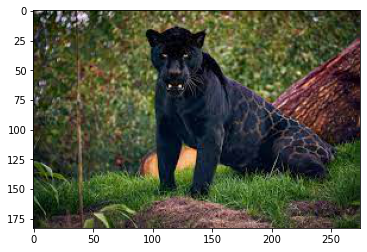

In [140]:
img = plt.imread('drive/MyDrive/Colab Notebooks/Animals/prova.jfif')
plt.imshow(img)

img_resized = resize(img,(50,50,3))
img_resized = img_resized.flatten()
img_resized = img_resized.reshape(1,-1)

y1 = img_resized
y1 = norm.transform(y1)
model.predict(y1)

array(['Jaguar'], dtype=object)

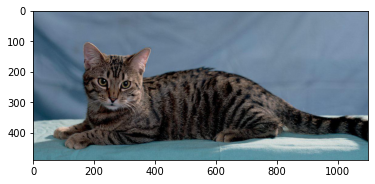

In [130]:
img1 = plt.imread('drive/MyDrive/Colab Notebooks/Animals/gatto.jpg')
plt.imshow(img1)
img1_resized = resize(img1, (50,50,3))
img1_resized = img1_resized.flatten()
img1_resized = img1_resized.reshape(1,-1)

y1 = img1_resized
y1 = norm.transform(y1)
model.predict(y1)

# Confusion Matrix whit k=3

In [149]:
confusion_matrix(y_pred,y_test)


array([[3, 4],
       [3, 3]])

# Fit using k=4

In [152]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(x_train,y_train)

y_pred1 = model.predict(x_test)
y_pred1


array(['Jaguar', 'Jaguar', 'Jaguar', 'Jaguar', 'Jaguar', 'Jaguar',
       'Leopard', 'Jaguar', 'Jaguar', 'Jaguar', 'Jaguar', 'Leopard',
       'Jaguar'], dtype=object)

In [153]:
accuracy_score(y_pred1,y_test)

0.6153846153846154

array(['Jaguar'], dtype=object)

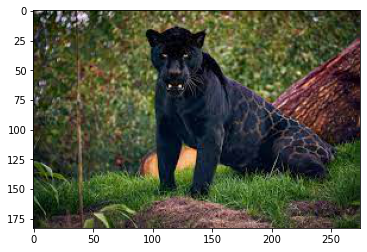

In [143]:
img = plt.imread('drive/MyDrive/Colab Notebooks/Animals/prova.jfif')
plt.imshow(img)

img_resized = resize(img,(50,50,3))
img_resized = img_resized.flatten()
img_resized = img_resized.reshape(1,-1)

y1 = img_resized
y1 = norm.transform(y1)
model.predict(y1)

array(['Jaguar'], dtype=object)

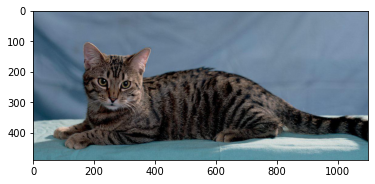

In [144]:
img1 = plt.imread('drive/MyDrive/Colab Notebooks/Animals/gatto.jpg')
plt.imshow(img1)
img1_resized = resize(img1, (50,50,3))
img1_resized = img1_resized.flatten()
img1_resized = img1_resized.reshape(1,-1)

y1 = img1_resized
y1 = norm.transform(y1)
model.predict(y1)

# Confusion Matrix using k=4

In [154]:
confusion_matrix(y_pred1,y_test)


array([[6, 5],
       [0, 2]])

# Fit using k=7

In [155]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(x_train,y_train)

y_pred2 = model.predict(x_test)
y_pred2

array(['Jaguar', 'Jaguar', 'Leopard', 'Jaguar', 'Jaguar', 'Leopard',
       'Leopard', 'Jaguar', 'Jaguar', 'Leopard', 'Leopard', 'Leopard',
       'Jaguar'], dtype=object)

In [146]:
accuracy_score(y_pred,y_test)


0.46153846153846156

array(['Jaguar'], dtype=object)

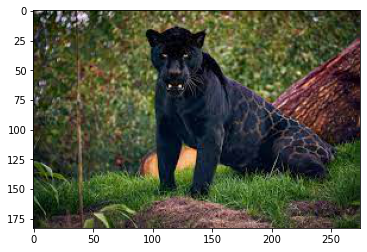

In [147]:
img = plt.imread('drive/MyDrive/Colab Notebooks/Animals/prova.jfif')
plt.imshow(img)

img_resized = resize(img,(50,50,3))
img_resized = img_resized.flatten()
img_resized = img_resized.reshape(1,-1)

y1 = img_resized
y1 = norm.transform(y1)
model.predict(y1)

array(['Jaguar'], dtype=object)

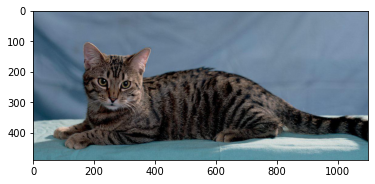

In [148]:
img1 = plt.imread('drive/MyDrive/Colab Notebooks/Animals/gatto.jpg')
plt.imshow(img1)
img1_resized = resize(img1, (50,50,3))
img1_resized = img1_resized.flatten()
img1_resized = img1_resized.reshape(1,-1)

y1 = img1_resized
y1 = norm.transform(y1)
model.predict(y1)

#Confusion Matrix using k=7

In [160]:
confusion_matrix(y_pred2,y_test)


array([[3, 4],
       [3, 3]])